In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [116]:
df = pd.read_csv('seattle-weather.csv')

In [117]:
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [119]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [120]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [121]:
df['date'] = pd.to_datetime(df['date'])

C:\Users\Aviral Trivedi\AppData\Local\Temp\ipykernel_11136\2532956188.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['date'].dt.strftime('date'), rotation=45)


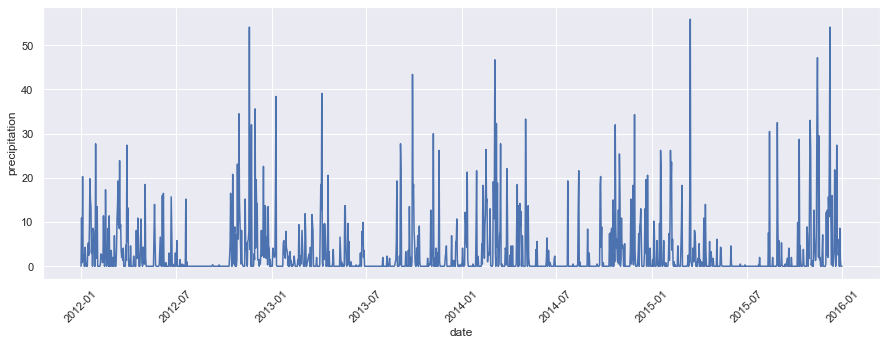

In [122]:
sns.lineplot(x='date',y='precipitation',data=df)
plt.xticks(rotation=45)
ax.set_xticklabels(df['date'].dt.strftime('date'), rotation=45)
plt.show()
sns.set(rc={'figure.figsize':(15,5)})


<AxesSubplot:xlabel='date', ylabel='temp_max'>

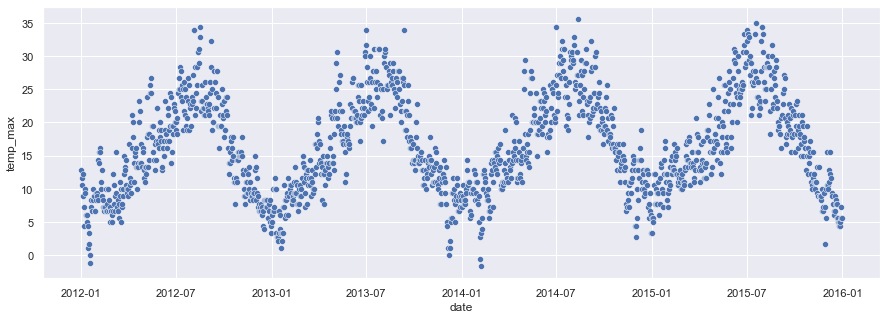

In [123]:
sns.scatterplot(x='date',y='temp_max',data=df)

<AxesSubplot:xlabel='date', ylabel='temp_min'>

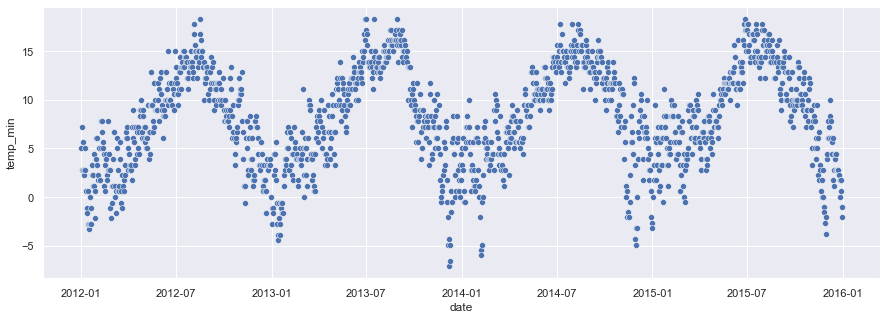

In [124]:
sns.scatterplot(x='date',y='temp_min',data=df)

<AxesSubplot:xlabel='date', ylabel='wind'>

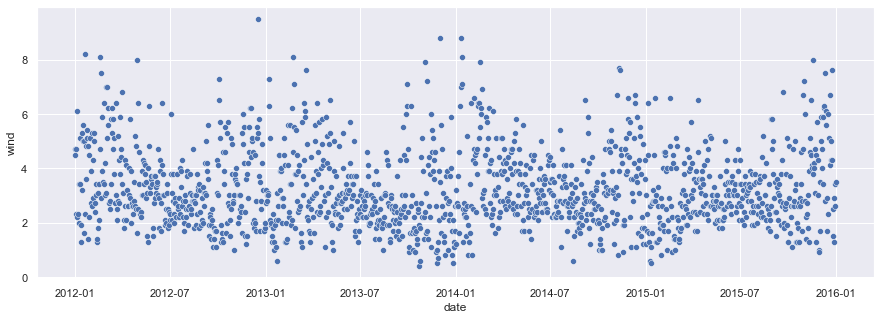

In [125]:
sns.scatterplot(x='date',y='wind',data=df)

<AxesSubplot:xlabel='weather', ylabel='count'>

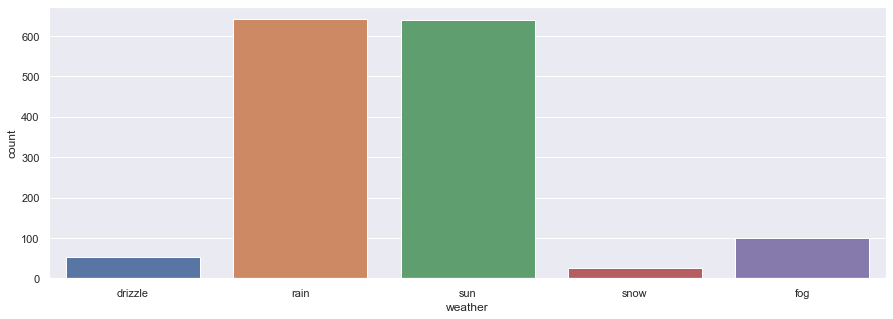

In [126]:
sns.countplot(x='weather',data=df)

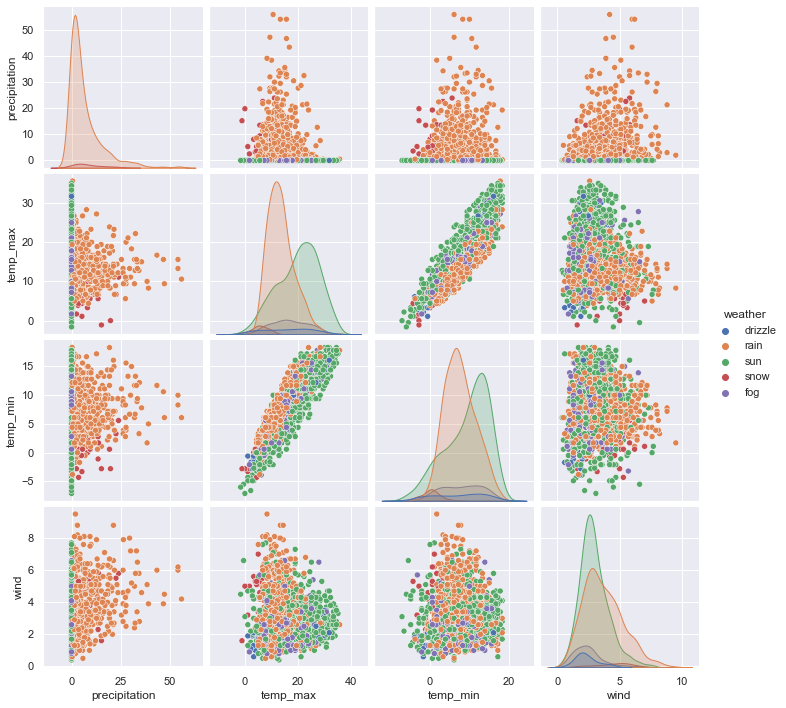

In [127]:
sns.pairplot(df,hue='weather')

<AxesSubplot:>

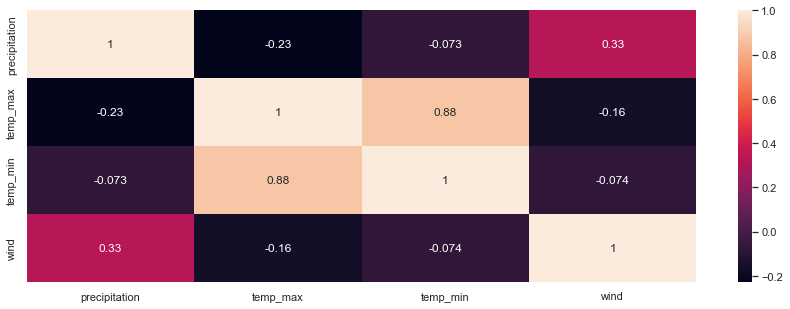

In [128]:
sns.heatmap(df.corr(),annot= True)

In [129]:
x = df.drop(['weather','date'],axis =1)
x.shape

(1461, 4)

In [130]:

df.head(10)    

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


In [131]:
y = (df['weather']=='rain').astype(int)
y.shape

(1461,)

In [132]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [133]:
d_tree = DecisionTreeClassifier()
d_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [134]:
predcitions = d_tree.predict(x_test)
predcitions
#1 represents rain and 0 represents no rain

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,

In [135]:
print(classification_report(y_test,predcitions))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       245
           1       0.90      0.92      0.91       194

    accuracy                           0.92       439
   macro avg       0.92      0.92      0.92       439
weighted avg       0.92      0.92      0.92       439



In [136]:
print(confusion_matrix(y_test,predcitions))

[[226  19]
 [ 15 179]]


In [137]:
print(accuracy_score(y_test,predcitions))

0.9225512528473804
